### Exploring The Entity Training Data Distribution

This notebook explores the given entity datalabels and the what a reasonable
train/test set might look like.

Ultimately we want to generate samples with the following columns:

- entity
- label (1/0, 1=dataset)

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [14]:
original_entity_list = pd.read_csv("../data/entity_classification/original_entity_list.csv")
ncses_priorities = pd.read_csv("../data/entity_classification/ncses_priorities.csv")
all_data = pd.concat([original_entity_list, ncses_priorities], ignore_index=True).drop_duplicates()
all_data.rename(columns={"long": "entity", "is_dataset": "label"}, inplace=True)
all_data

,entity,label
0,National Education Longitudinal Study,1
1,NOAA tidal station,1
2,SLOSH model,1
3,NOAA C-CAP,1
4,Aging Integrated Database (AGID),1
...,...,...
4999,NSF Survey of Federal Science and Engineering ...,1
5000,Survey of Federal Funds for Research and Devel...,1
5001,NSF Survey of Federal Funds for Research and D...,1
5002,National Science Foundation Survey of Federal ...,1


In [16]:
train_df, test_df = train_test_split(all_data, test_size=0.2, random_state=42)

<AxesSubplot: >

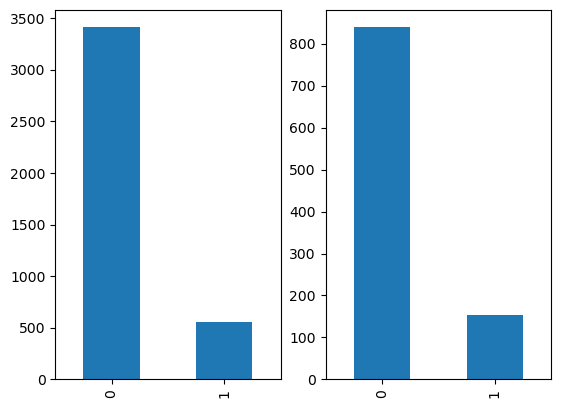

In [20]:
f, (ax_train, ax_test) = plt.subplots(ncols=2)
train_df.label.value_counts().plot(kind="bar", ax=ax_train)
test_df.label.value_counts().plot(kind="bar", ax=ax_test)

The data distributions seem to be fair with respect to the train and test
distributions, but for both the train and test there is a severe imbalance
between the true/false labels. That is something to keep in mind during
training.